## Introduction: Business Analysis of Sales Data
In this analysis, we will explore the sales performance of various products across different regions, retailers, and sales methods. Our objective is to address key business questions that are critical for making informed decisions, optimizing sales strategies, and understanding consumer behavior. By conducting a series of statistical tests and comparisons, we aim to answer the following business questions:

<br>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/Adidas-US-Sales-Analysis/main/Adidas%20US%20Sales%20Dataset.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


<br>

## General Sales Analysis

### 1. What is the total revenue generated across all retailers?

In [4]:
df['Total Sales'].sum()

899902125.0

The total sales amount to **$899,902,125 USD**. This significant figure reflects the overall performance across all product categories, regions, retailers, and sales methods.

<br>


### 2. Which retailer contributes the most to total sales revenue?

In [5]:
df.groupby('Retailer')['Total Sales'].sum()

Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: Total Sales, dtype: float64

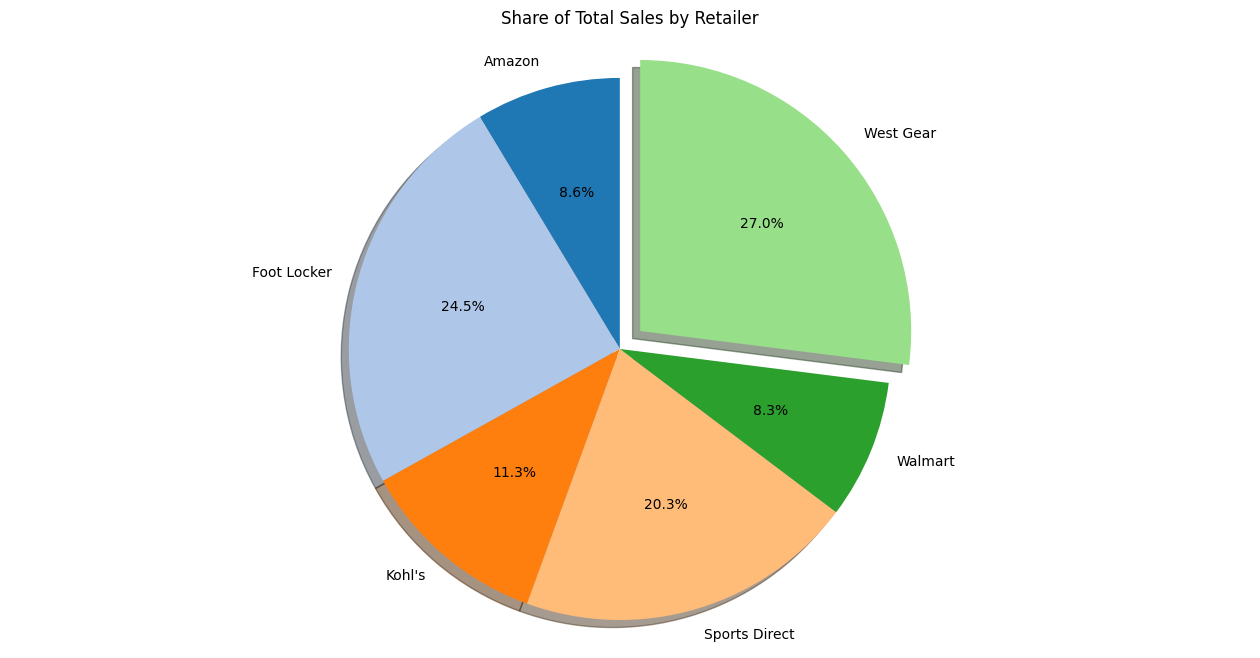

In [6]:
total_sales_by_retailer = df.groupby('Retailer')['Total Sales'].sum()

fig, ax = plt.subplots(figsize=(16, 8))
explode_index = total_sales_by_retailer.idxmax()
explode = [0.1 if retailer == explode_index else 0 for retailer in total_sales_by_retailer.index]
colors = plt.get_cmap('tab20').colors
ax.pie(total_sales_by_retailer, labels=total_sales_by_retailer.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=colors[:len(total_sales_by_retailer)])
ax.axis('equal')
ax.set_title('Share of Total Sales by Retailer')
plt.show()

In the total revenue from the sale of Adidas products in the analyzed dataset, the largest share belongs to the retailer **West Gear** with a total of **$242,964,333 USD** which represents **27%** of the total sales.

<br>


### 3. What is the average sales revenue?

In [8]:
df['Total Sales'].mean()

93273.4375

The average revenue in the Adidas sales dataset stands at an impressive **$93,273.43 USD**.

<br>


### 4. How does the number of units sold vary by region?

In [12]:
df.groupby('Region')['Units Sold'].sum()

Region
Midwest      391337
Northeast    501279
South        492260
Southeast    407000
West         686985
Name: Units Sold, dtype: int64

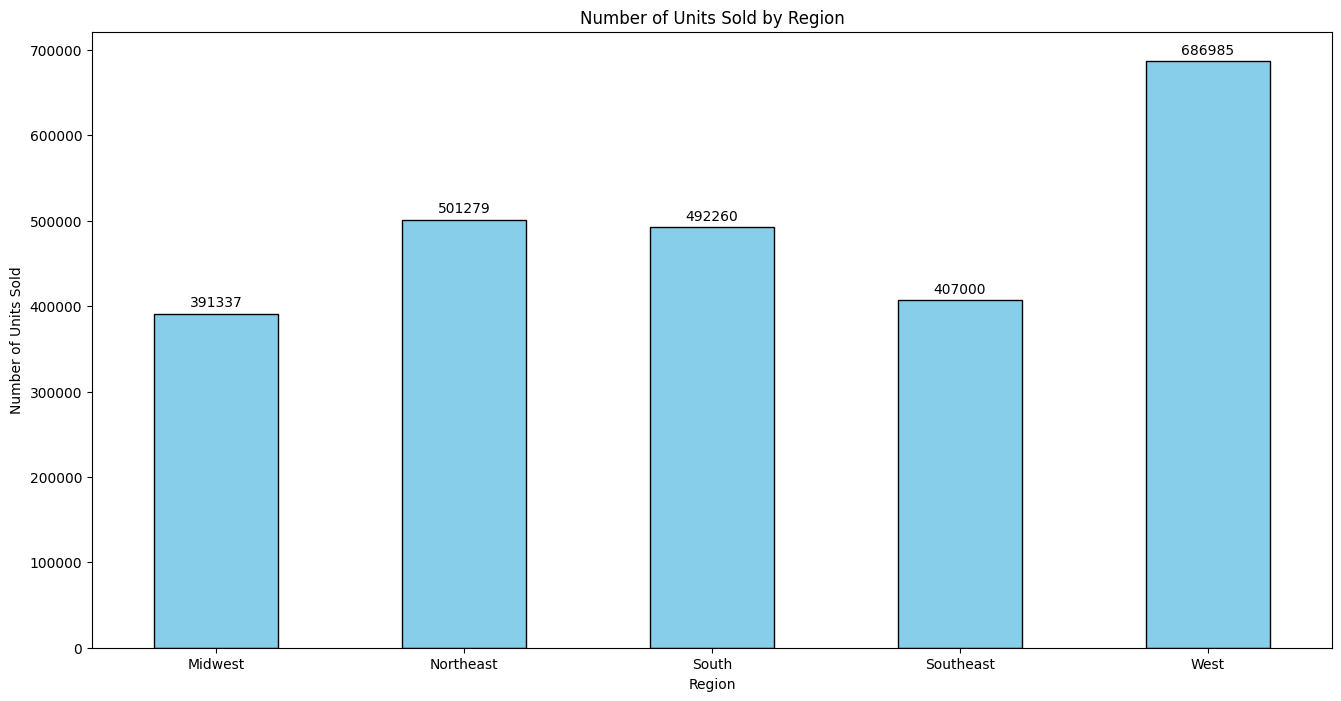

In [13]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Region')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Number of Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The number of units sold varies significantly by region. The **West** leads with **686 985** units sold, demonstrating the highest demand in that area. The **Northeast** follows with **501 279** units sold, and the **South** is close behind with **492 260** units. The **Southeast** shows slightly lower sales, with **407 000** units sold, while the **Midwest** has the smallest share, with **391 337** units sold. These figures indicate that sales are highest in the Western region, while the Midwest experiences relatively lower demand.

<br>


### 5. Which city generates the highest total sales?

In [19]:
df.groupby('City')['Total Sales'].sum().nlargest(1)

City
Charleston    39974797.0
Name: Total Sales, dtype: float64

Among the cities listed, **Charleston** generates the highest total sales, amounting to **$39 974 797**. This figure highlights Charleston as the leading city in terms of total sales performance.

<br>


### 6. How many unique retailers are present in the dataset?

In [22]:
df['Retailer'].nunique()

6

There are **6 unique retailers** present in the dataset.

<br>

### 7. What is the most sold product category by volume?

In [32]:
def split_product(product):
    parts = product.split("'", 1)
    return parts[0].strip(), parts[1].strip() if len(parts) > 1 else ''

In [35]:
df[['Gender', 'Category']] = df['Product'].apply(lambda x: pd.Series(split_product(x)))
df['Category'] = df['Category'].str.lstrip('s ').str.strip()

In [38]:
df.groupby('Category')['Units Sold'].sum()

Category
Apparel              740510
Athletic Footwear    752762
Street Footwear      985589
Name: Units Sold, dtype: int64

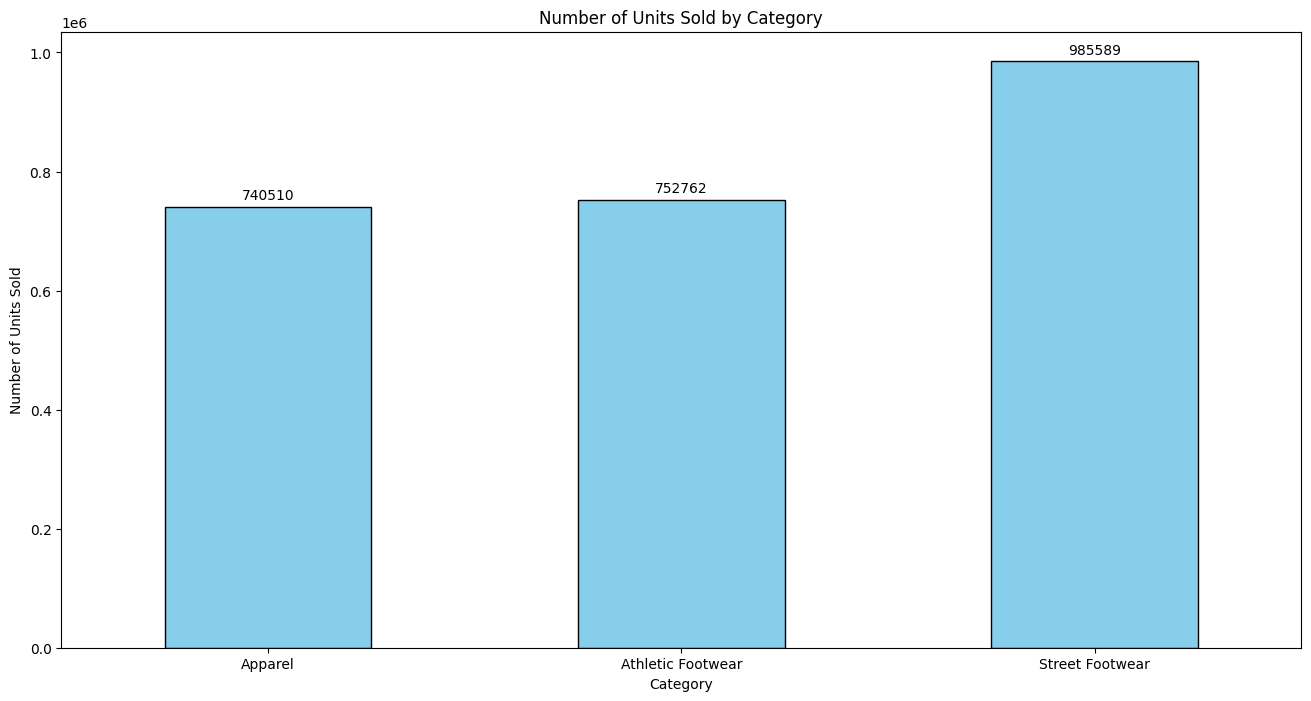

In [39]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Number of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The most sold product category by volume is **Street Footwear**, with a total of **985 589** units sold. This category leads in sales volume compared to Apparel and Athletic Footwear.

<br>


### 8. What is the total sales revenue for each region?

In [41]:
df.groupby('Region')['Total Sales'].sum()

Region
Midwest      135800459.0
Northeast    186324067.0
South        144663181.0
Southeast    163171236.0
West         269943182.0
Name: Total Sales, dtype: float64

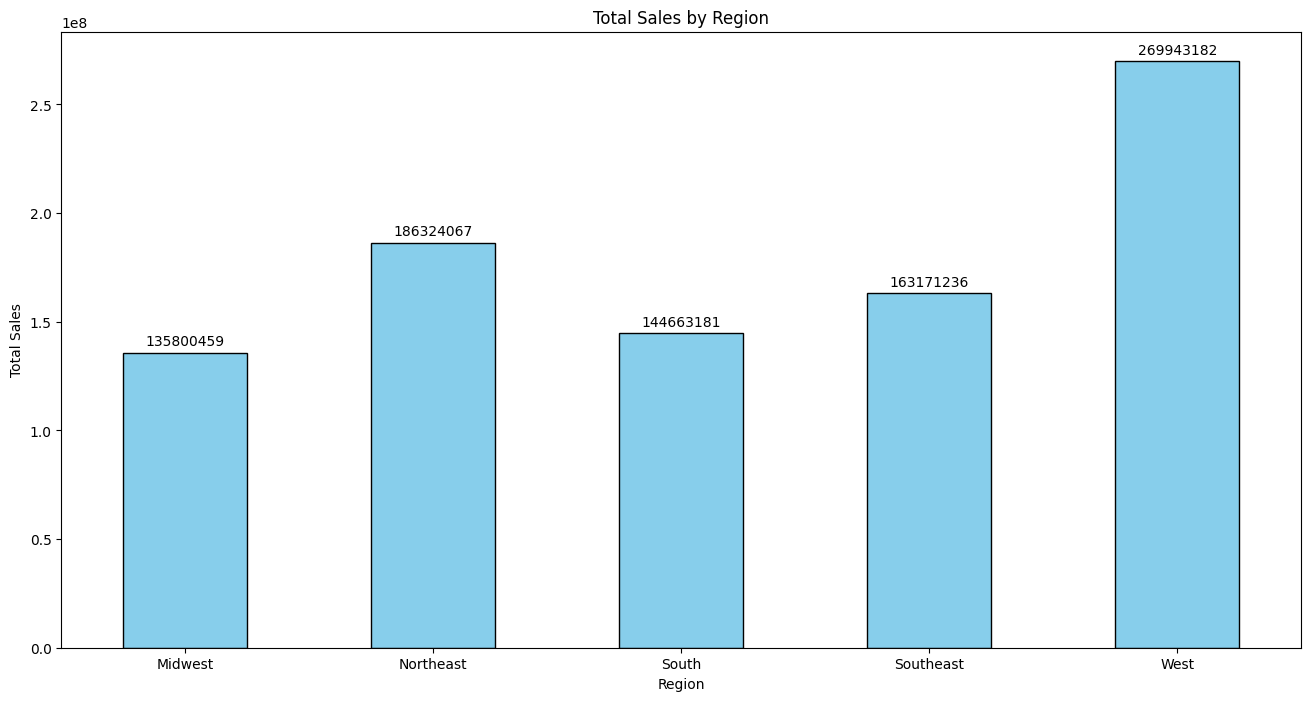

In [42]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Region')['Total Sales'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The total sales revenue for each region is as follows: The **Midwest** generated **$135 800 459**, while the **Northeast** achieved **$186 324 067**. The **South** accumulated **$144 663 181** in sales revenue and the **Southeast** reached **$163 171 236**. The **West** leads with the highest revenue, totaling **$269 943 182**.

<br>


### 9. How does sales revenue vary by product category?

In [45]:
df.groupby('Category')['Total Sales'].sum()

Category
Apparel              302767492.0
Athletic Footwear    260305576.0
Street Footwear      336829057.0
Name: Total Sales, dtype: float64

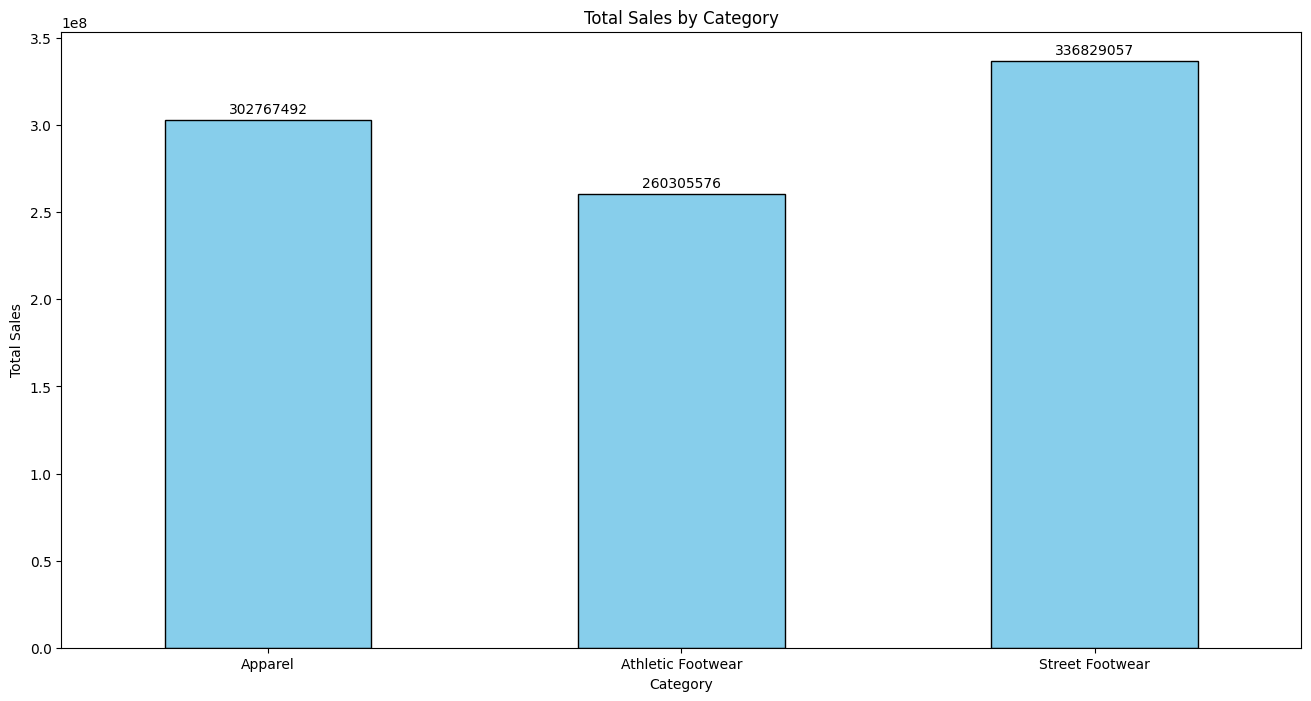

In [47]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Category')['Total Sales'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

Sales revenue varies significantly by product category. **Street Footwear** leads with the highest revenue, totaling **$336 829 057**. This is followed by **Apparel**, which generated **$302 767 492** in revenue. **Athletic Footwear** comes in third, with a total revenue of **$260 305 576**.

<br>


### 10. What are the top three cities in terms of total sales?

In [48]:
df.groupby('City')['Total Sales'].sum().nlargest(3)

City
Charleston       39974797.0
New York         39801235.0
San Francisco    34539220.0
Name: Total Sales, dtype: float64

The top three cities in terms of total sales are **Charleston** with **$39 974 797**, **New York** with **$39 801 235** and **San Francisco** with **$34 539 220**.

<br>


### 11. Which region contributes the most to profit?

In [50]:
df.groupby('Region')['Operating Profit'].sum()

Region
Midwest      52811346.48
Northeast    68020587.65
South        61138004.07
Southeast    60555416.70
West         89609406.55
Name: Operating Profit, dtype: float64

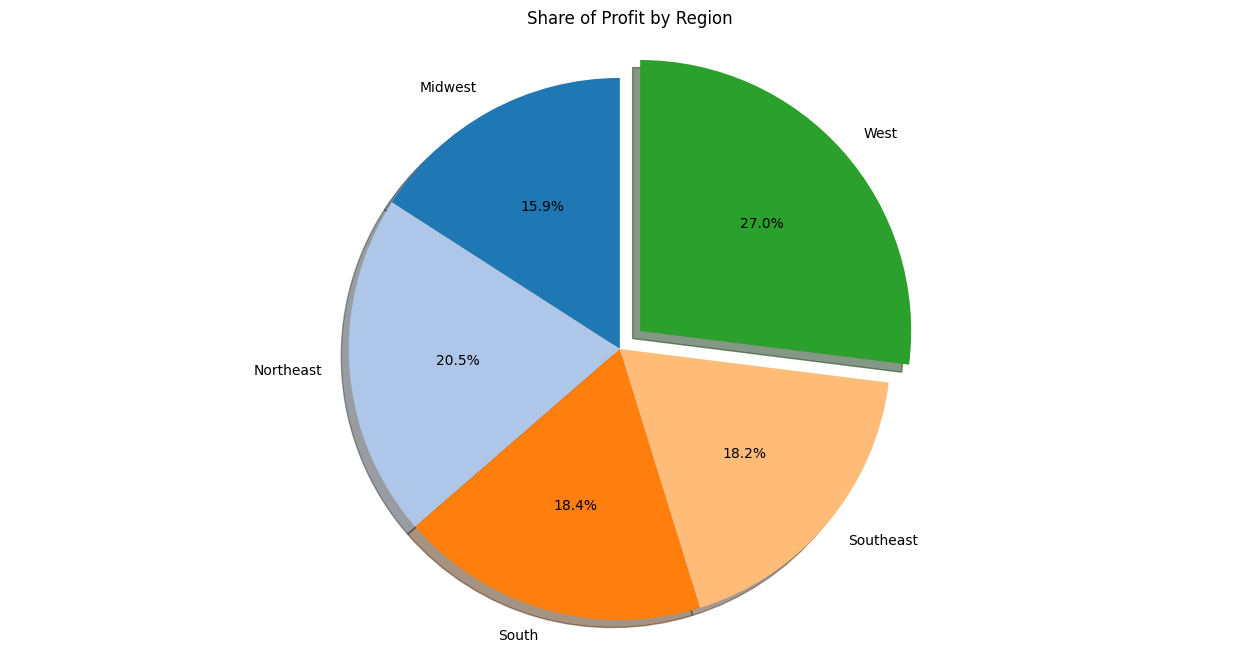

In [51]:
profit_by_region = df.groupby('Region')['Operating Profit'].sum()

fig, ax = plt.subplots(figsize=(16, 8))
explode_index = profit_by_region.idxmax()
explode = [0.1 if retailer == explode_index else 0 for retailer in profit_by_region.index]
colors = plt.get_cmap('tab20').colors
ax.pie(profit_by_region, labels=profit_by_region.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=colors[:len(total_sales_by_retailer)])
ax.axis('equal')
ax.set_title('Share of Profit by Region')
plt.show()

In the total profit from the sale of Adidas products in the analyzed dataset, the largest share belongs to the **West** region with a total of **$89 609 406.55** which represents **27%** of the total profit.

<br>

### 12. What is the percentage of sales generated by men's products vs. women's products?

In [54]:
gender_sales = df.groupby('Gender')['Total Sales'].sum()
total_sales = gender_sales.sum()

men_sales_percentage = (gender_sales['Men'] / total_sales) * 100
women_sales_percentage = (gender_sales['Women'] / total_sales) * 100

men_sales_percentage, women_sales_percentage
print(f"Men's sales percentage: {men_sales_percentage:.2f}%")
print(f"Women's sales percentage: {women_sales_percentage:.2f}%")

Men's sales percentage: 54.03%
Women's sales percentage: 45.97%


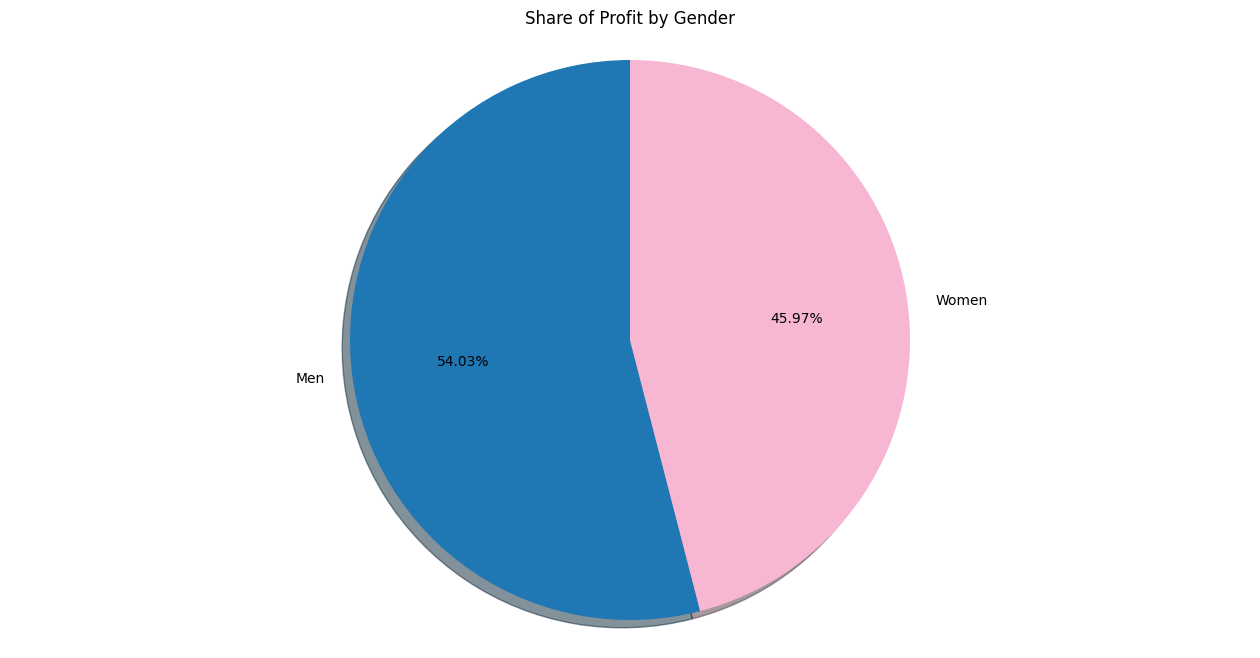

In [71]:
fig, ax = plt.subplots(figsize=(16, 8))
colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)]
ax.pie(gender_sales, labels=gender_sales.index, autopct='%1.2f%%', startangle=90, shadow=True, colors=colors)
ax.axis('equal')
ax.set_title('Share of Profit by Gender')
plt.show()

Men's products account for **54.03%** of the total sales, while women's products represent **45.97%**.

<br>